Kaggle LSTM:
https://www.kaggle.com/amirrezaeian/time-series-data-analysis-using-lstm-tutorial

https://aqicn.org/data-platform/register/

Note: the daily AQI is based on the 24 hours average of hourly readings.

Ursynów, Warszawa, Mazowieckie past 85 months daily average AQI
Data Sources
Regional Inspectorate for Environmental Protection in Warsaw (Wojewódzki Inspektorat Ochrony Środowiska w Warszawie) - Główny inspektorat ochrony środowiska

In [1]:
import os

In [2]:
os.chdir("C:/Users/KonuTech/Downloads/deep-learning-LSTM-air-quality-Ursynow-at-Warsaw")

In [3]:
from functions import *

In [4]:
df = pd.read_csv("ursynów,-warszawa, mazowieckie-air-quality.csv", infer_datetime_format="True", parse_dates=["date"], index_col="date", delimiter=',')

In [5]:
df.columns = df.columns.str.strip()

In [6]:
cols = list(df.columns)
for i in range(len(cols)):
    df[cols[i]] = pd.to_numeric(df[cols[i]], errors='coerce')

In [7]:
df.sort_index(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2475 entries, 2013-12-31 to 2021-01-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm25    2432 non-null   float64
 1   pm10    2433 non-null   float64
 2   o3      2441 non-null   float64
 3   no2     2417 non-null   float64
 4   so2     1628 non-null   float64
 5   co      588 non-null    float64
dtypes: float64(6)
memory usage: 135.4 KB


In [9]:
df.describe()

,pm25,pm10,o3,no2,so2,co
count,2432.000,2433.000,2441.000,2417.000,1628.000,588.000
mean,62.799,25.111,24.838,9.423,2.994,4.446
std,28.816,12.229,11.927,5.505,2.109,2.733
min,11.000,3.000,1.000,1.000,1.000,1.000
25%,42.000,16.000,16.000,6.000,2.000,3.000
50%,56.500,23.000,24.000,8.000,2.000,4.000
75%,78.000,31.000,33.000,12.000,4.000,6.000
max,174.000,86.000,74.000,43.000,25.000,20.000


### Dealing with NULL values of series

In [10]:
df.isna().sum()

pm25      43
pm10      42
o3        34
no2       58
so2      847
co      1887
dtype: int64

In [11]:
df[df["pm25"].isna() == True]

,pm25,pm10,o3,no2,so2,co
date,,,,,,
2013-12-31,nan,41.000,14.000,6.000,4.000,4.000
2014-05-31,nan,8.000,28.000,3.000,3.000,nan
2014-07-13,nan,13.000,43.000,5.000,2.000,4.000
2014-10-06,nan,28.000,28.000,6.000,3.000,4.000
2014-10-12,nan,25.000,22.000,9.000,1.000,nan
2014-11-01,nan,46.000,12.000,9.000,6.000,nan
2014-12-31,nan,27.000,16.000,4.000,2.000,8.000
2015-01-30,nan,22.000,13.000,10.000,5.000,6.000
2015-04-25,nan,17.000,27.000,9.000,2.000,nan


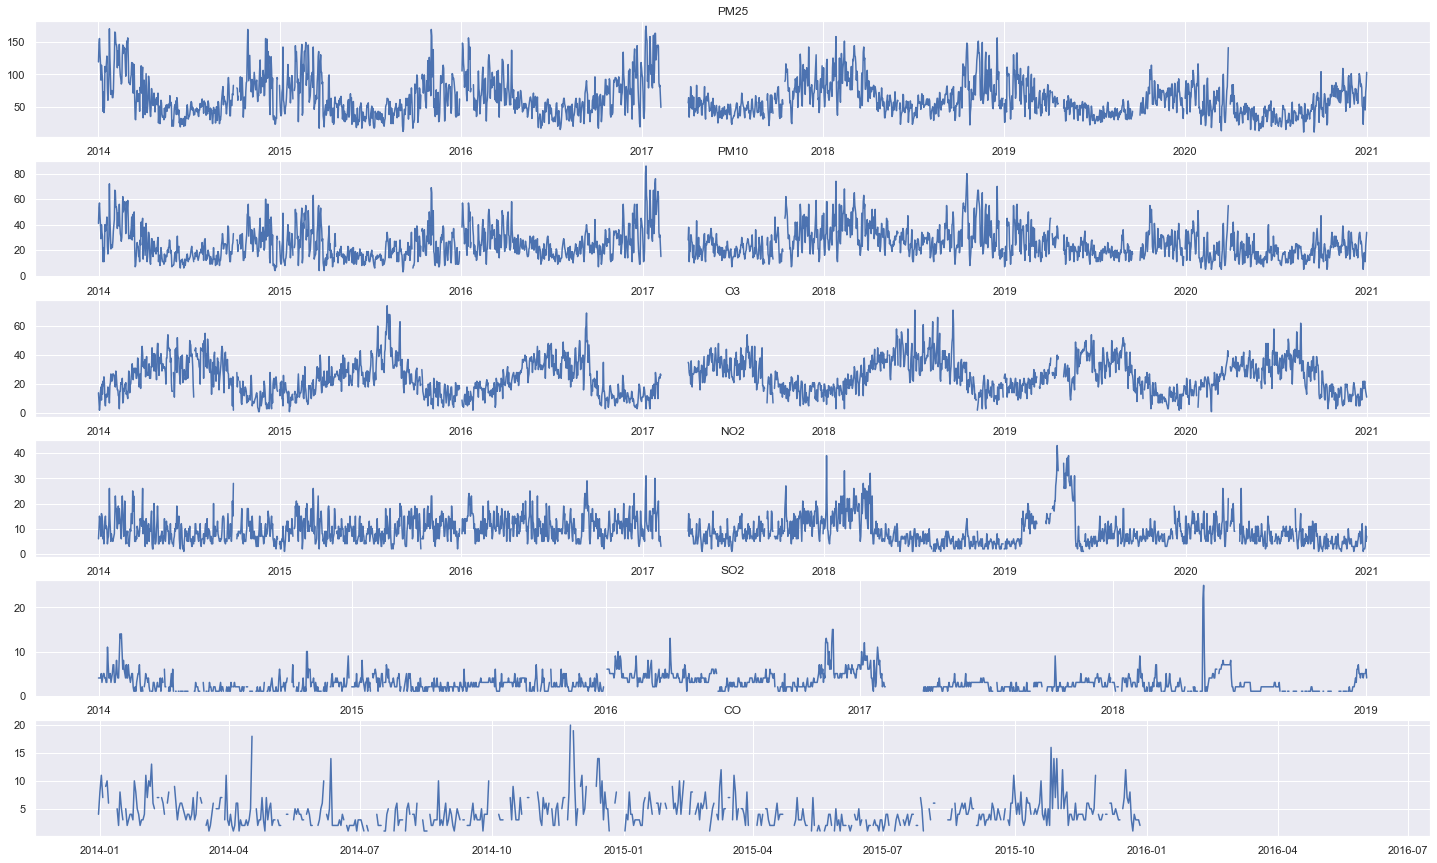

In [12]:
plt.figure(figsize=(25, 15))

cols = list(df.columns)
for i in range(len(cols)):
    plt.subplot(len(cols), 1, i+1)
    plt.title(cols[i].upper())
    plt.plot(df[cols[i]])

### Resampling for diffrent intervals & Interpolation of NULLs

methodstr, default ‘linear’
Interpolation technique to use. One of:

‘linear’: Ignore the index and treat the values as equally spaced. This is the only method supported on MultiIndexes.

‘time’: Works on daily and higher resolution data to interpolate given length of interval.

‘index’, ‘values’: use the actual numerical values of the index.

‘pad’: Fill in NaNs using existing values.

‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘spline’, ‘barycentric’, ‘polynomial’: Passed to scipy.interpolate.interp1d. These methods use the numerical values of the index. Both ‘polynomial’ and ‘spline’ require that you also specify an order (int), e.g. df.interpolate(method='polynomial', order=5).

‘krogh’, ‘piecewise_polynomial’, ‘spline’, ‘pchip’, ‘akima’, ‘cubicspline’: Wrappers around the SciPy interpolation methods of similar names. See Notes.

‘from_derivatives’: Refers to scipy.interpolate.BPoly.from_derivatives which replaces ‘piecewise_polynomial’ interpolation method in scipy 0.18.

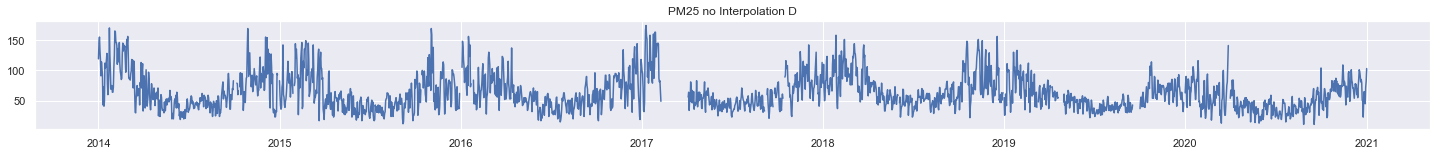

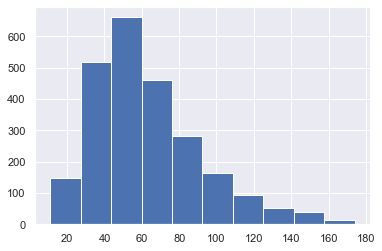

pm25
quadratic
W


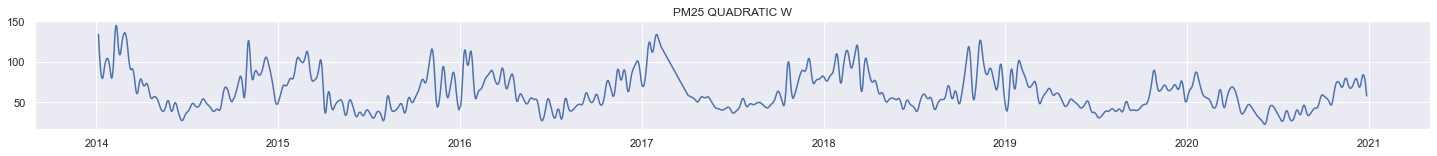

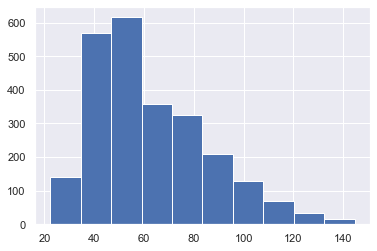

pm25
quadratic
M


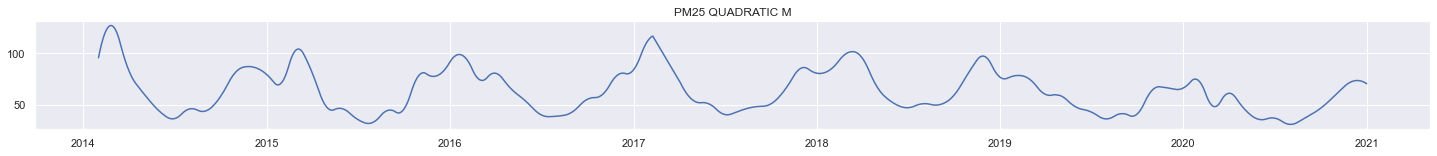

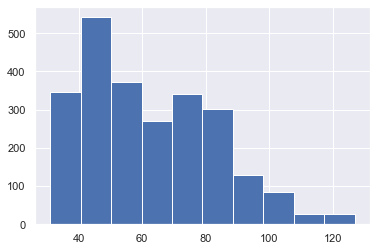

pm25
quadratic
Q


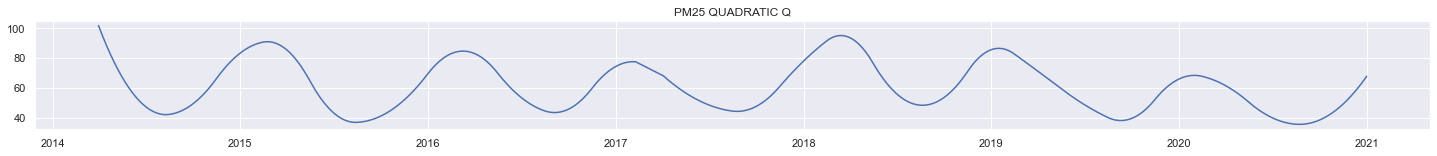

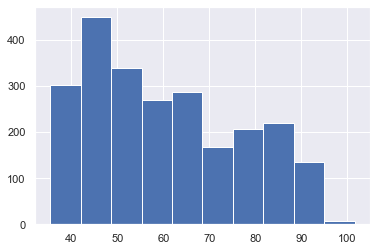

pm25
quadratic
Y


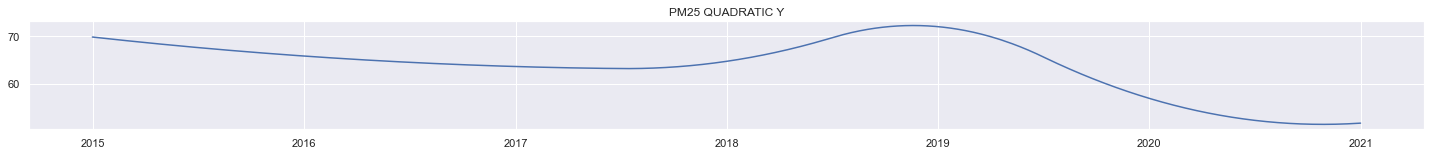

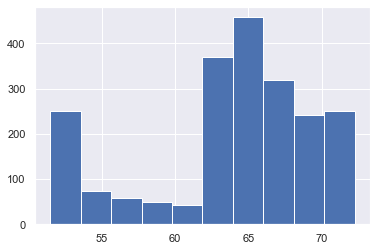

pm25
piecewise_polynomial
W


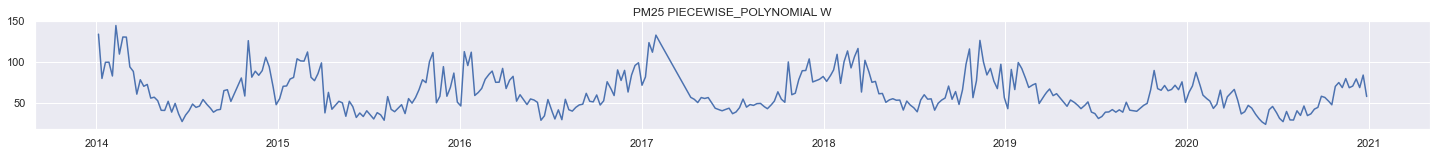

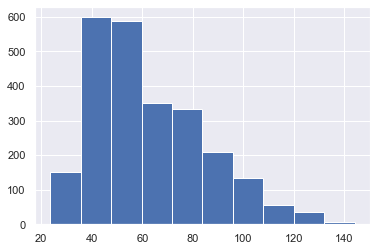

pm25
piecewise_polynomial
M


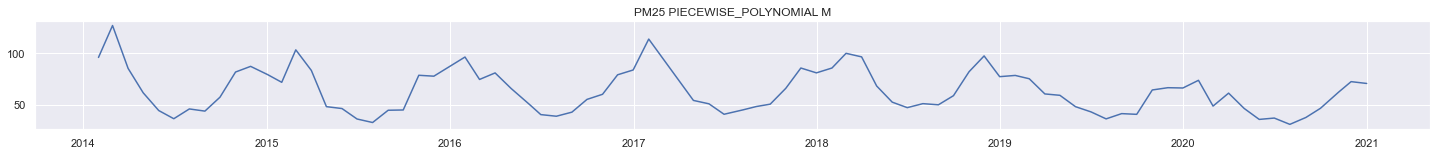

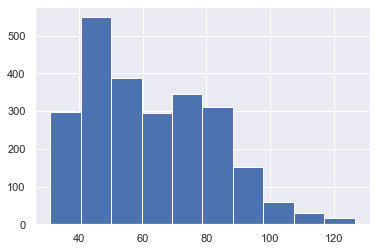

pm25
piecewise_polynomial
Q


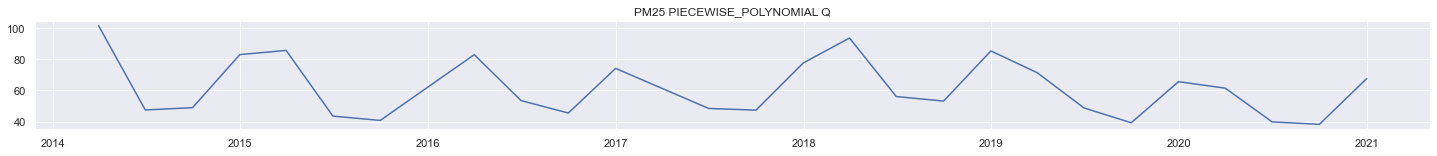

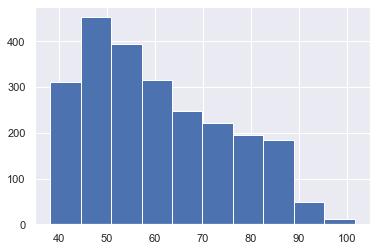

pm25
piecewise_polynomial
Y


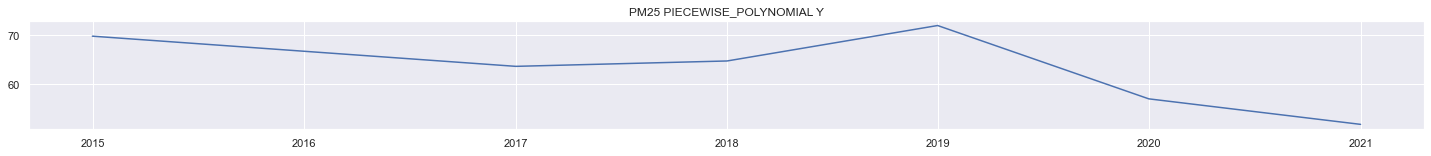

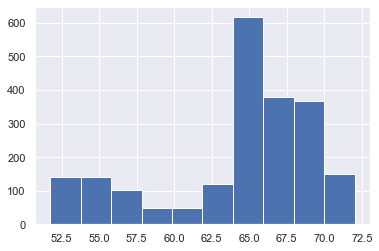

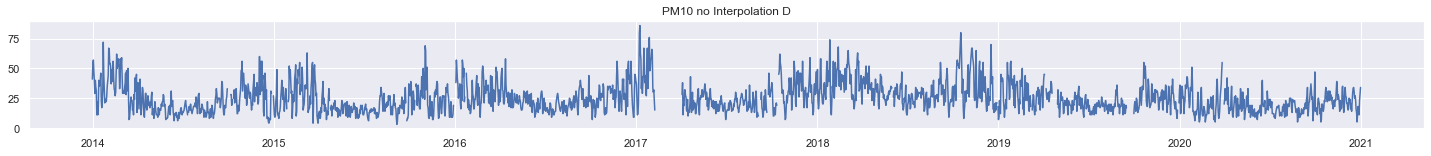

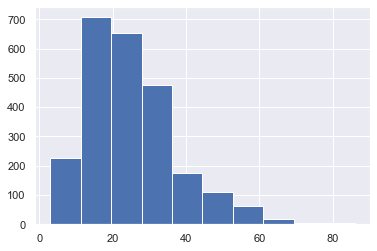

pm10
quadratic
W


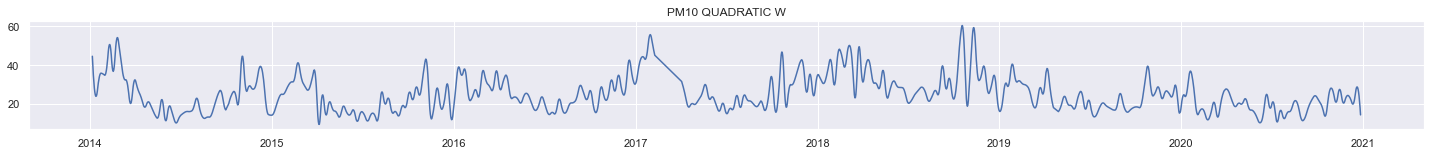

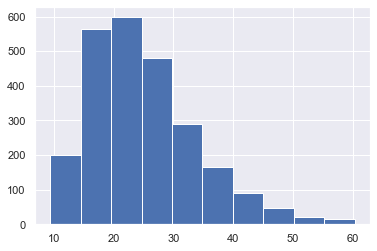

pm10
quadratic
M


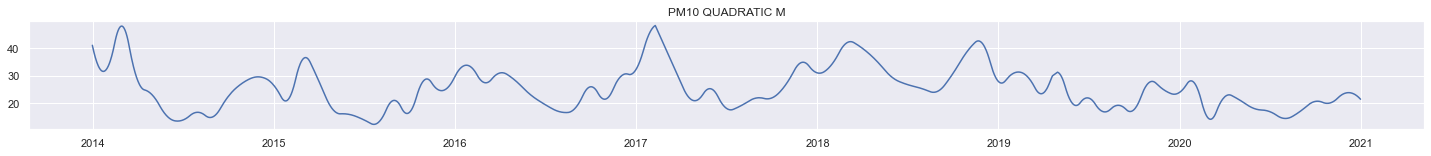

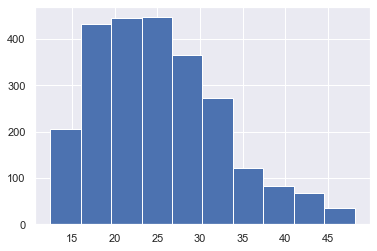

pm10
quadratic
Q


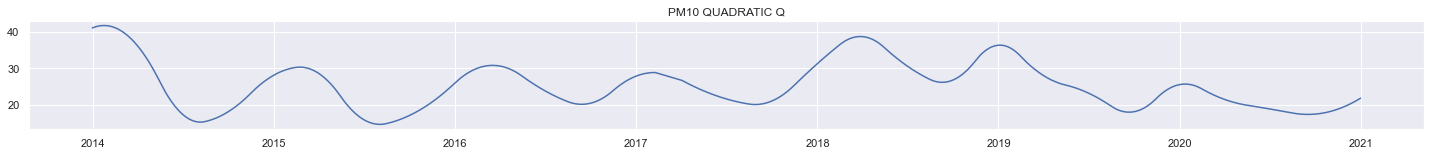

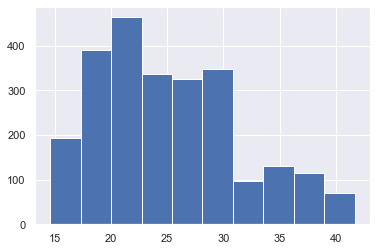

pm10
quadratic
Y


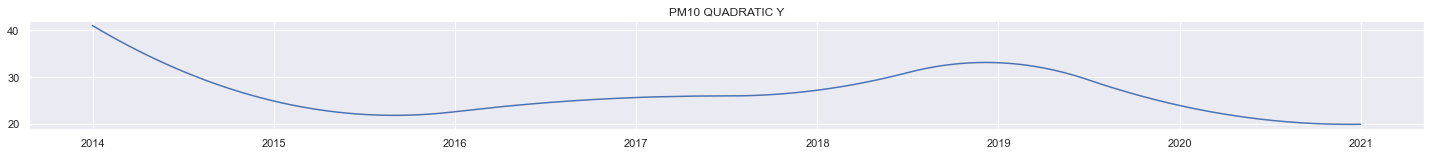

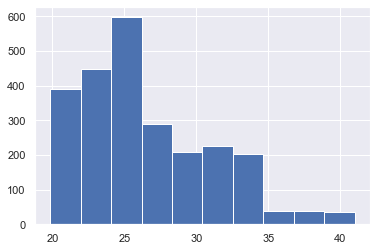

pm10
piecewise_polynomial
W


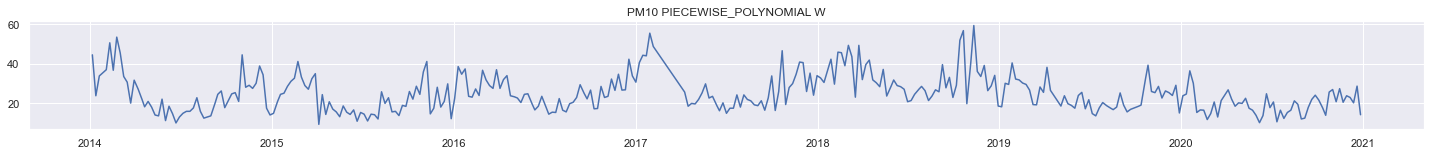

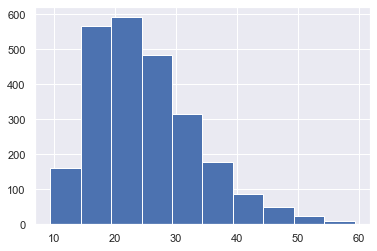

pm10
piecewise_polynomial
M


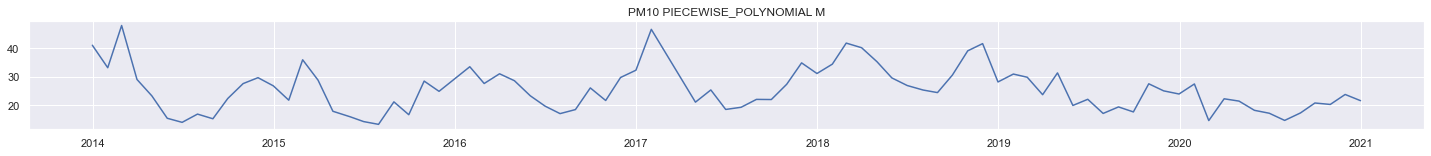

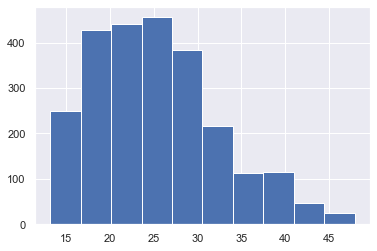

pm10
piecewise_polynomial
Q


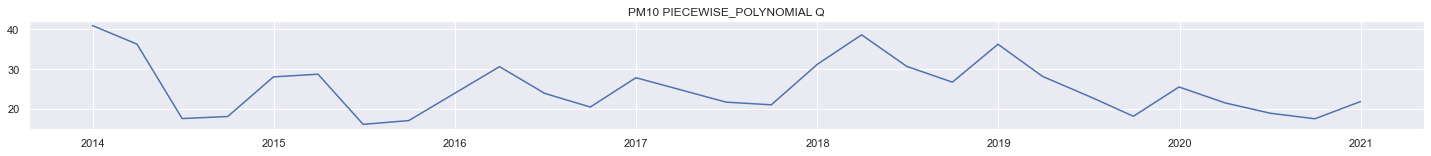

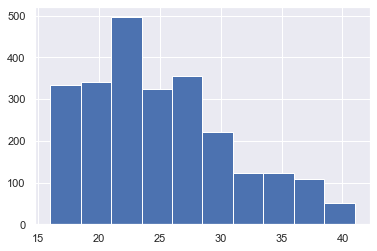

pm10
piecewise_polynomial
Y


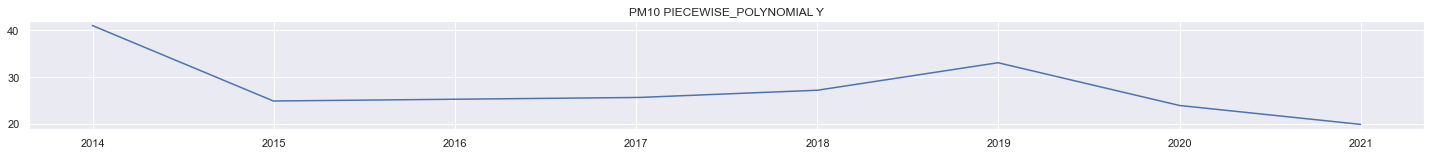

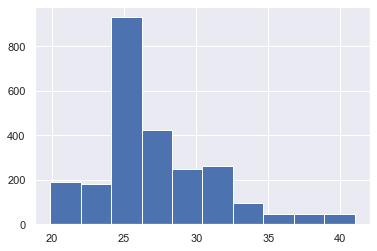

In [13]:
data = df.copy()
cols = list(data.columns)
cols = ["pm25", "pm10"]
#method = ["nearest", "zero", "slinear", "quadratic", "barycentric", "krogh", "piecewise_polynomial", "pchip", "akima", "cubicspline"]
method = ["quadratic", "piecewise_polynomial"]
sample = ["W", "M", "Q", "Y"]

for i in range(len(cols)):
    
    plt.figure(figsize=(25, 2))
    plt.title(cols[i].upper() + " no Interpolation" + " D")
    plt.plot(data[cols[i]])
    plt.show()
    plt.hist(data[cols[i]])
    plt.show()
    
    for j in range(len(method)):
        for k in range(len(sample)):
            
            data = df.copy()

            print(cols[i])
            print(method[j])
            print(sample[k])
                        
            data[cols[i]] = data[cols[i]].resample(sample[k]).mean()
            data[cols[i]] = data[cols[i]].interpolate(method=method[j])
            

            plt.figure(figsize=(25, 2))
            plt.title(cols[i].upper() + " " + method[j].upper() + " " + sample[k].upper())
            plt.plot(data[cols[i]])
            plt.show()
            plt.hist(data[cols[i]])
            plt.show()

In [14]:
df.loc['2017-10-13':'2017-10-15']

,pm25,pm10,o3,no2,so2,co
date,,,,,,
2017-10-13,nan,nan,15.000,9.000,2.000,nan
2017-10-14,nan,nan,13.000,9.000,1.000,nan
2017-10-15,nan,45.000,18.000,18.000,2.000,nan


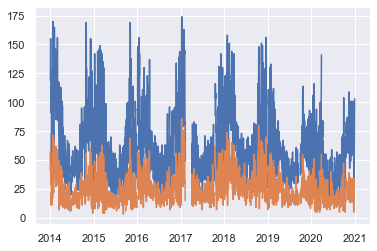

In [15]:
plt.plot(df[["pm25", "pm10"]])

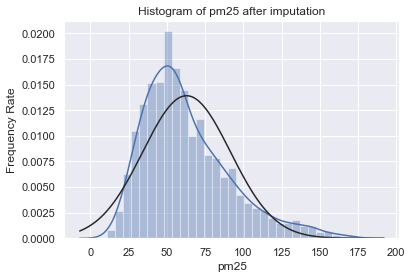

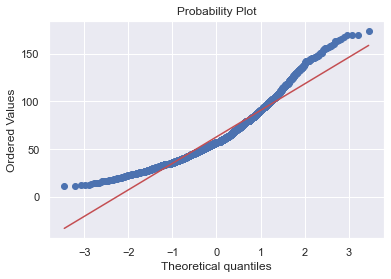

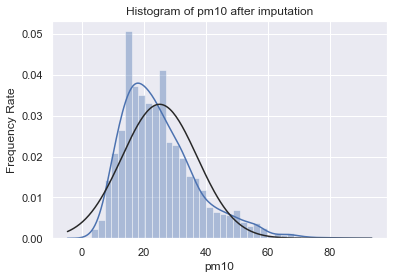

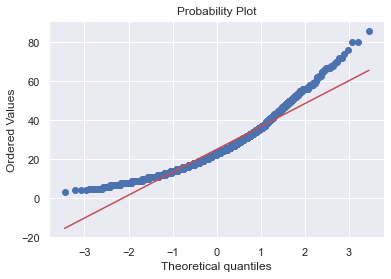

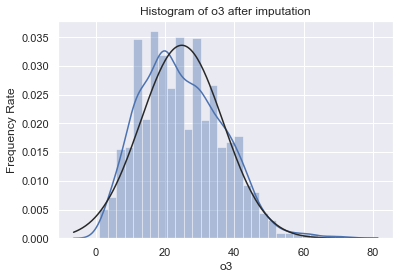

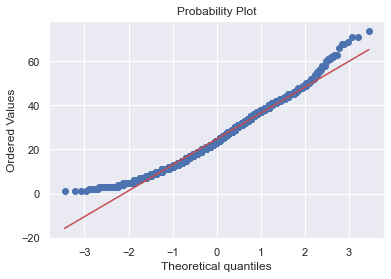

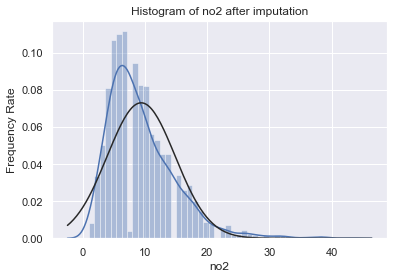

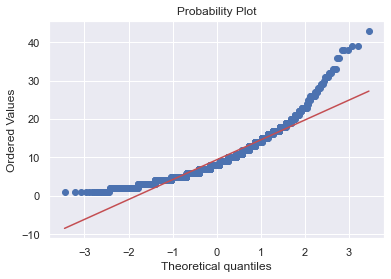

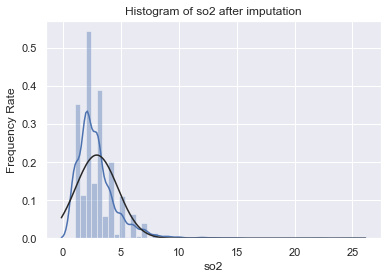

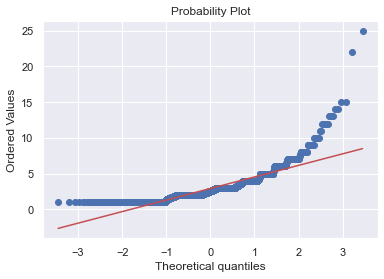

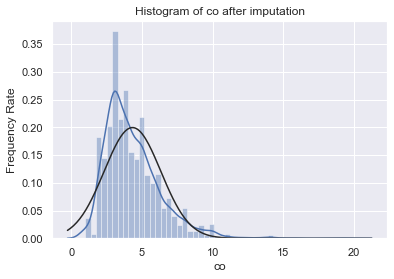

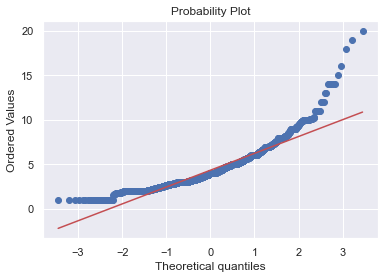

<Figure size 432x288 with 0 Axes>

In [16]:
floats_without_nulls = choose_imputer_and_visualise_floats(dataframe=df
                                                           ,variables=df.columns
                                                           ,target=None
                                                           ,imputer=KNNImputer
                                                           ,strategy=None
                                                           ,weights="distance")
#floats_without_nulls

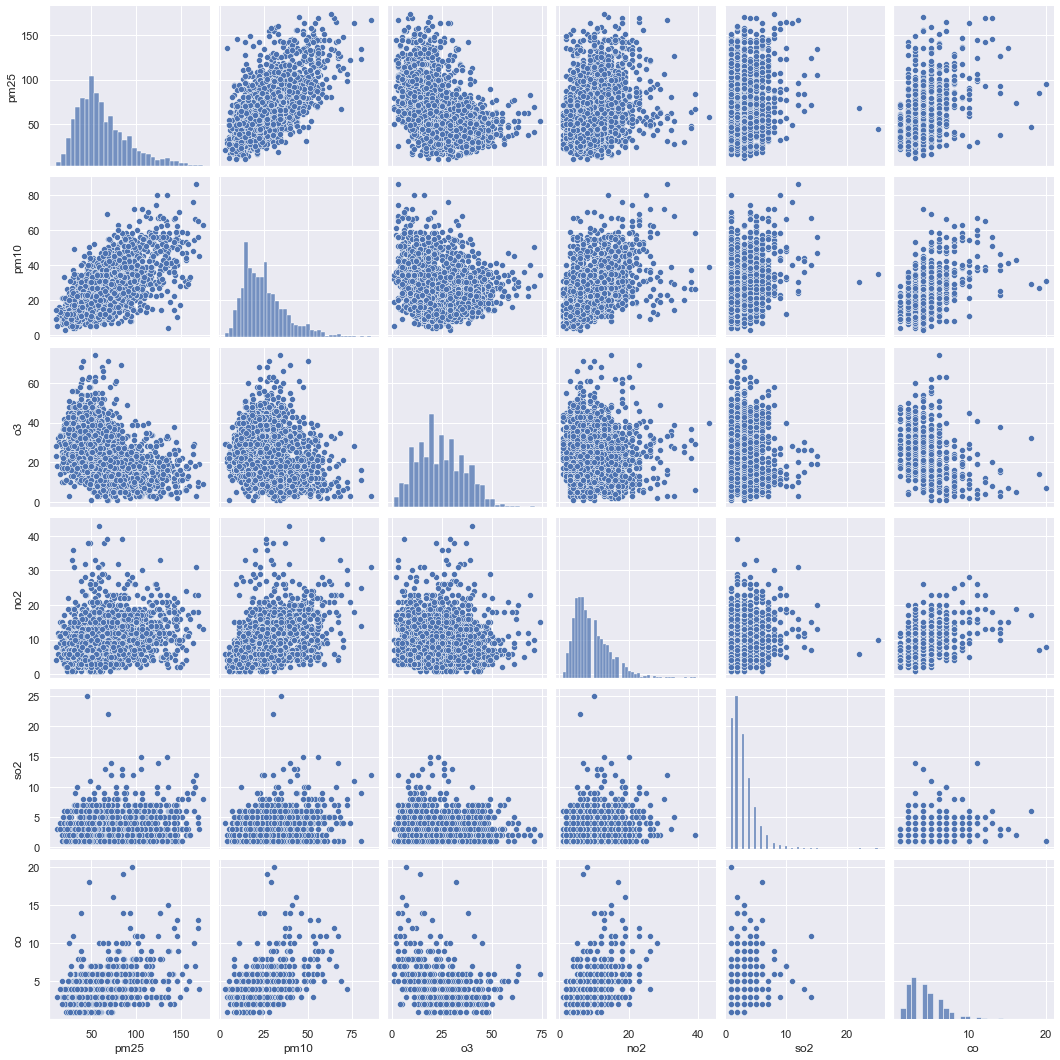

In [17]:
sns.pairplot(df)

In [18]:
# plt.subplots(figsize=(15,5))
# matrix = np.triu(df.corr())
# sns_plot = sns.heatmap(df.corr(), annot=True, mask=matrix)
# fig = sns_plot.get_figure()
# fig.savefig("ini_corr_matrix.jpg")
# plt.clf()

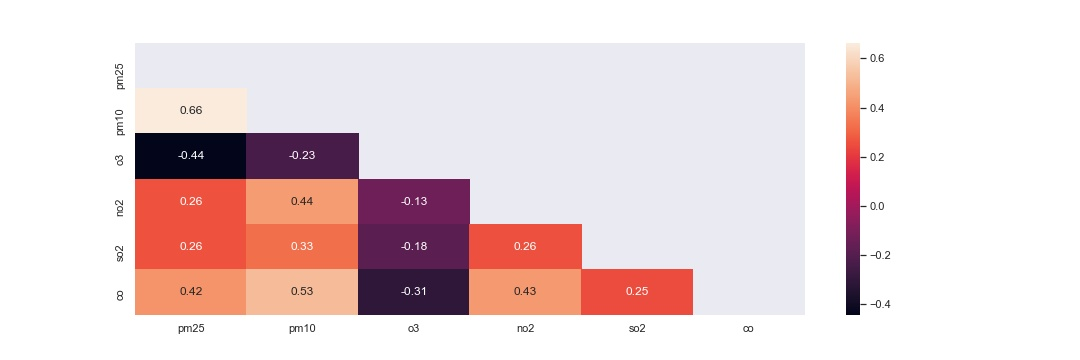

In [19]:
Image(filename='ini_corr_matrix.jpg')

# 3. Preprocessing

### Resampling to Weeks

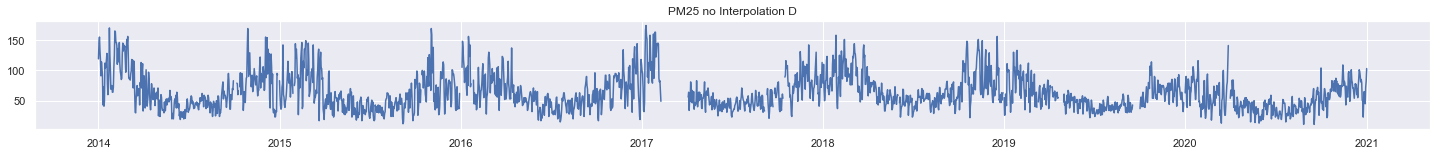

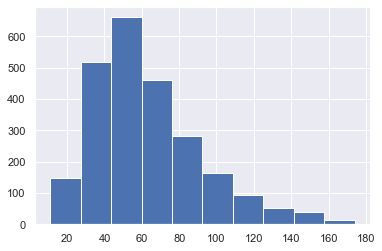

pm25
piecewise_polynomial
W


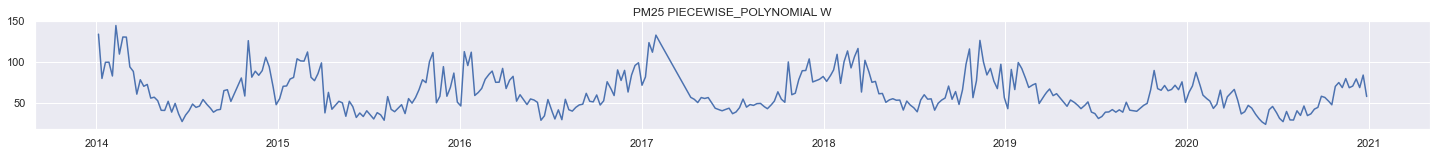

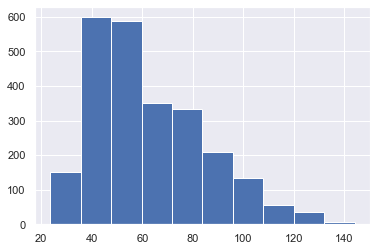

In [20]:
data = df.copy()
cols = list(data.columns)
cols = ["pm25"]
method = ["piecewise_polynomial"]
sample = ["W"]

for i in range(len(cols)):
    
    plt.figure(figsize=(25, 2))
    plt.title(cols[i].upper() + " no Interpolation" + " D")
    plt.plot(data[cols[i]])
    plt.show()
    plt.hist(data[cols[i]])
    plt.show()
    
    for j in range(len(method)):
        for k in range(len(sample)):
            
            data = df.copy()

            print(cols[i])
            print(method[j])
            print(sample[k])
                        
            data[cols[i]] = data[cols[i]].resample(sample[k]).mean()
            data[cols[i]] = data[cols[i]].interpolate(method=method[j])
            

            plt.figure(figsize=(25, 2))
            plt.title(cols[i].upper() + " " + method[j].upper() + " " + sample[k].upper())
            plt.plot(data[cols[i]])
            plt.show()
            plt.hist(data[cols[i]])
            plt.show()

In [21]:
data.shape[0]

2475

In [22]:
data = data[data["pm25"].isnull() == False]
data

,pm25,pm10,o3,no2,so2,co
date,,,,,,
2014-01-05,133.600,29.000,18.000,7.000,3.000,9.000
2014-01-06,125.882,40.000,9.000,16.000,4.000,10.000
2014-01-07,118.163,34.000,20.000,15.000,5.000,6.000
2014-01-08,110.445,31.000,13.000,13.000,5.000,nan
2014-01-09,102.727,11.000,22.000,6.000,4.000,nan
...,...,...,...,...,...,...
2020-12-23,72.510,13.000,18.000,5.000,nan,nan
2020-12-24,68.776,5.000,22.000,1.000,nan,nan
2020-12-25,65.041,12.000,17.000,2.000,nan,nan


### Log1p transformation

In [23]:
transformed = data.copy()
for column in data.columns:
    transformed[column] = data[column].apply(np.log1p)

In [24]:
transformed

,pm25,pm10,o3,no2,so2,co
date,,,,,,
2014-01-05,4.902,3.401,2.944,2.079,1.386,2.303
2014-01-06,4.843,3.714,2.303,2.833,1.609,2.398
2014-01-07,4.780,3.555,3.045,2.773,1.792,1.946
2014-01-08,4.714,3.466,2.639,2.639,1.792,nan
2014-01-09,4.642,2.485,3.135,1.946,1.609,nan
...,...,...,...,...,...,...
2020-12-23,4.297,2.639,2.944,1.792,nan,nan
2020-12-24,4.245,1.792,3.135,0.693,nan,nan
2020-12-25,4.190,2.565,2.890,1.099,nan,nan


### MinMax Scaler

In [25]:
mms = MinMaxScaler()
scaled = mms.fit_transform(transformed)

In [26]:
data_transfomed_scaled = pd.DataFrame(scaled, index=transformed.index, columns=transformed.columns)

In [27]:
data_transfomed_scaled

,pm25,pm10,o3,no2,so2,co
date,,,,,,
2014-01-05,0.958,0.654,0.621,0.448,0.270,0.684
2014-01-06,0.924,0.756,0.444,0.692,0.357,0.725
2014-01-07,0.889,0.704,0.649,0.673,0.428,0.533
2014-01-08,0.851,0.675,0.537,0.630,0.428,nan
2014-01-09,0.811,0.357,0.674,0.405,0.357,nan
...,...,...,...,...,...,...
2020-12-23,0.617,0.407,0.621,0.355,nan,nan
2020-12-24,0.588,0.132,0.674,0.000,nan,nan
2020-12-25,0.557,0.383,0.606,0.131,nan,nan


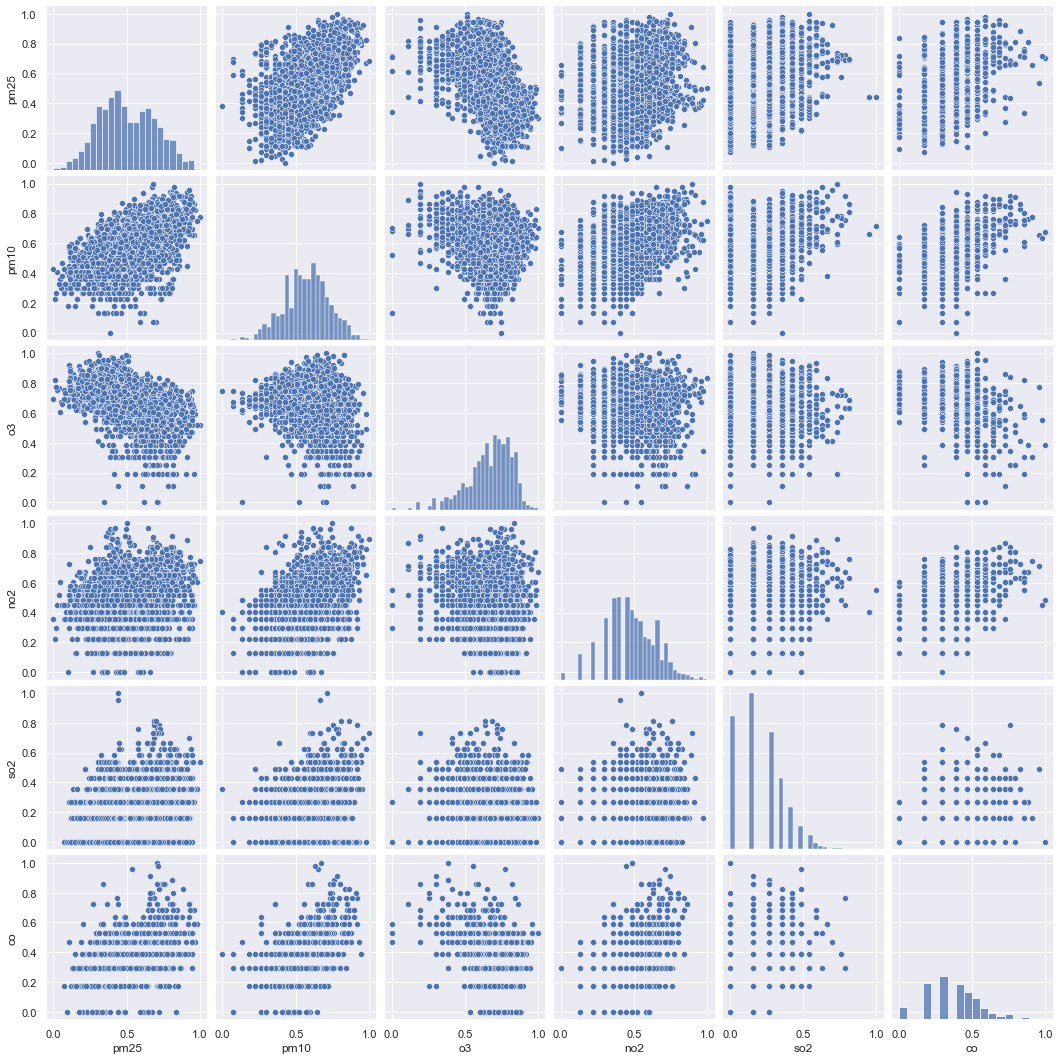

In [28]:
sns.pairplot(data_transfomed_scaled)

In [29]:
plt.subplots(figsize=(15,5))
matrix = np.triu(data_transfomed_scaled.corr())
sns_plot = sns.heatmap(data_transfomed_scaled.corr(), annot=True, mask=matrix)
fig = sns_plot.get_figure()
fig.savefig("transfomed_scaled_corr_matrix.jpg")
plt.clf()

<Figure size 1080x360 with 0 Axes>

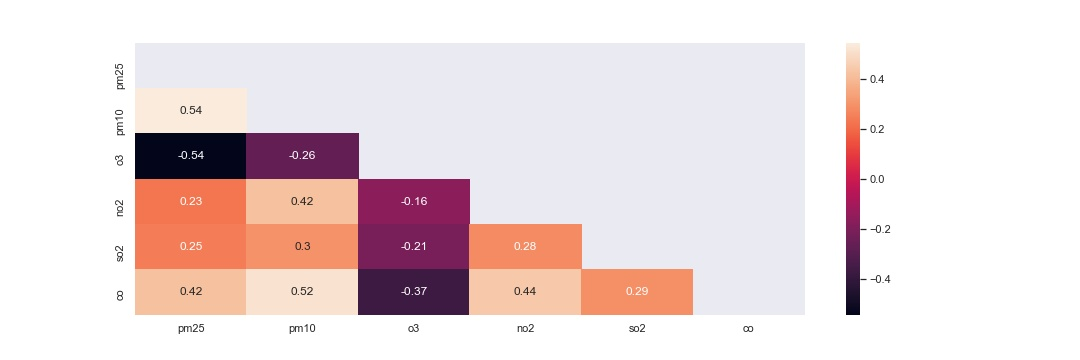

In [30]:
Image(filename='transfomed_scaled_corr_matrix.jpg')

### Train Test Split

In [31]:
data.shape

(2465, 6)

In [32]:
data_transfomed_scaled.shape[0] / 365.25

6.74880219028063

In [33]:
n_train_time = round(365.25*6)
n_train_time

2192

In [34]:
data_transfomed_scaled

,pm25,pm10,o3,no2,so2,co
date,,,,,,
2014-01-05,0.958,0.654,0.621,0.448,0.270,0.684
2014-01-06,0.924,0.756,0.444,0.692,0.357,0.725
2014-01-07,0.889,0.704,0.649,0.673,0.428,0.533
2014-01-08,0.851,0.675,0.537,0.630,0.428,nan
2014-01-09,0.811,0.357,0.674,0.405,0.357,nan
...,...,...,...,...,...,...
2020-12-23,0.617,0.407,0.621,0.355,nan,nan
2020-12-24,0.588,0.132,0.674,0.000,nan,nan
2020-12-25,0.557,0.383,0.606,0.131,nan,nan


In [42]:
X_train, X_test = train_test_split(data_transfomed_scaled, test_size=0.01, shuffle=False)

In [44]:
X_train

,pm25,pm10,o3,no2,so2,co
date,,,,,,
2014-01-05,0.958,0.654,0.621,0.448,0.270,0.684
2014-01-06,0.924,0.756,0.444,0.692,0.357,0.725
2014-01-07,0.889,0.704,0.649,0.673,0.428,0.533
2014-01-08,0.851,0.675,0.537,0.630,0.428,nan
2014-01-09,0.811,0.357,0.674,0.405,0.357,nan
...,...,...,...,...,...,...
2020-11-28,0.597,0.450,0.444,0.296,nan,nan
2020-11-29,0.600,0.632,0.415,0.405,nan,nan
2020-11-30,0.609,0.704,0.415,0.405,nan,nan


In [45]:
X_test

,pm25,pm10,o3,no2,so2,co
date,,,,,,
2020-12-03,0.638,0.554,0.516,0.224,nan,nan
2020-12-04,0.647,0.554,0.621,0.224,nan,nan
2020-12-05,0.656,0.488,0.662,0.000,nan,nan
2020-12-06,0.665,0.450,0.635,0.131,nan,nan
2020-12-07,0.654,0.538,0.606,0.224,nan,nan
2020-12-08,0.643,0.608,0.537,0.224,nan,nan
2020-12-09,0.632,0.582,0.516,0.355,nan,nan
2020-12-10,0.620,0.595,0.303,0.355,nan,nan
2020-12-11,0.609,0.470,0.494,0.224,nan,nan


In [ ]:
# split into train and test sets
values = reframed.values

n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].